# Support Vector Machines (SVM)

Use SVM to classify penguins with dataset *palmerpenguins*

In [1]:
!pip install palmerpenguins

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## I- Import dataset

In [3]:
from palmerpenguins import load_penguins
penguins = load_penguins()

## II- Dataset description

In [5]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [7]:
import collections
print(penguins.shape)
print(collections.Counter(penguins.species))

(344, 8)
Counter({'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68})


**344** penguins with **8** attributes:
- *species* : Adelie (152 ), Gentoo (124) Ginstrap (68)
- *island*: Biscoe, Dream et Torgersen
- *bill_length_mm* 
- *bil_depth_mm*
- *flipper_length_mm*
- *body_mass_g*
- *sex*
- *year*

### Missing data

In [8]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

Here we choose to ignore missing data

In [9]:
palmerpenguins = penguins[penguins['bill_depth_mm'].notna()]
palmerpenguins = palmerpenguins.reset_index()
palmerpenguins.shape

(342, 9)

we could have also imputed them with *SimpleImputer* of *sklearn.impute* for instance.

### Features

From now on we will only look at *bill_depth_mm*,  *bill_length_mm*, *flipper_length_mm* et *body_mass_g*.

In [10]:
penguins_features = palmerpenguins[["bill_length_mm", "bill_depth_mm","body_mass_g", "flipper_length_mm"]]

### Labels

Lets transform the species into integers to manipulate them more easily

In [11]:
species_names, species_int = np.unique(palmerpenguins.species, return_inverse=True)
print(species_names)

['Adelie' 'Chinstrap' 'Gentoo']


In [12]:
penguins_labels = pd.DataFrame(palmerpenguins["species"])
penguins_labels["species_int"] = species_int

In [13]:
penguins_labels

species  species_int
0       Adelie            0
1       Adelie            0
2       Adelie            0
3       Adelie            0
4       Adelie            0
..         ...          ...
337  Chinstrap            1
338  Chinstrap            1
339  Chinstrap            1
340  Chinstrap            1
341  Chinstrap            1

[342 rows x 2 columns]

## III- SVM with linear kernel

### 1. Standard

Let's look only at **2 species (labels)** : **Adelie (0)** et **Gentoo (2)** and **2 features 
** : *body_mass_g* et *bill_length_mm*.
 
Let's train a **linear SVM**.
using [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from svm of scikit-learn.

In [16]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.2 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 30.8 MB/s eta 0:00:00


In [17]:
from sklearn import svm

In [18]:
# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["body_mass_g", "bill_length_mm"]])
# data = np.array(data[["body_mass_g", "flipper_length_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=10, kernel='linear')

Performance :

In [19]:
print(clf.score(data, labels))

0.9452554744525548


In [20]:
help(clf.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.svm._classes.SVC instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for `X`.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of ``self.predict(X)`` w.r.t. `y`.



### 2. Features standardisation

Let's see the impact on the performance by standardisons the features, done by `scikit-learn` :
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [21]:
from sklearn import preprocessing

# Select the 2 features
data = penguins_features[penguins_labels["species_int"].isin([0,2])] 
#data = np.array(data[["body_mass_g", "bill_length_mm"]])
data = np.array(data[["body_mass_g", "flipper_length_mm"]])

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])

# initialize a model
clf = svm.SVC(kernel='linear', C=1)

# fit the model
clf.fit(X= data_scaled, y = labels)

SVC(C=1, kernel='linear')

Let's look at the hyperplan splitting them !

/tmp/ipykernel_94563/3747792796.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  adelie = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==0),0],
/tmp/ipykernel_94563/3747792796.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  gentoo = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==2),0],


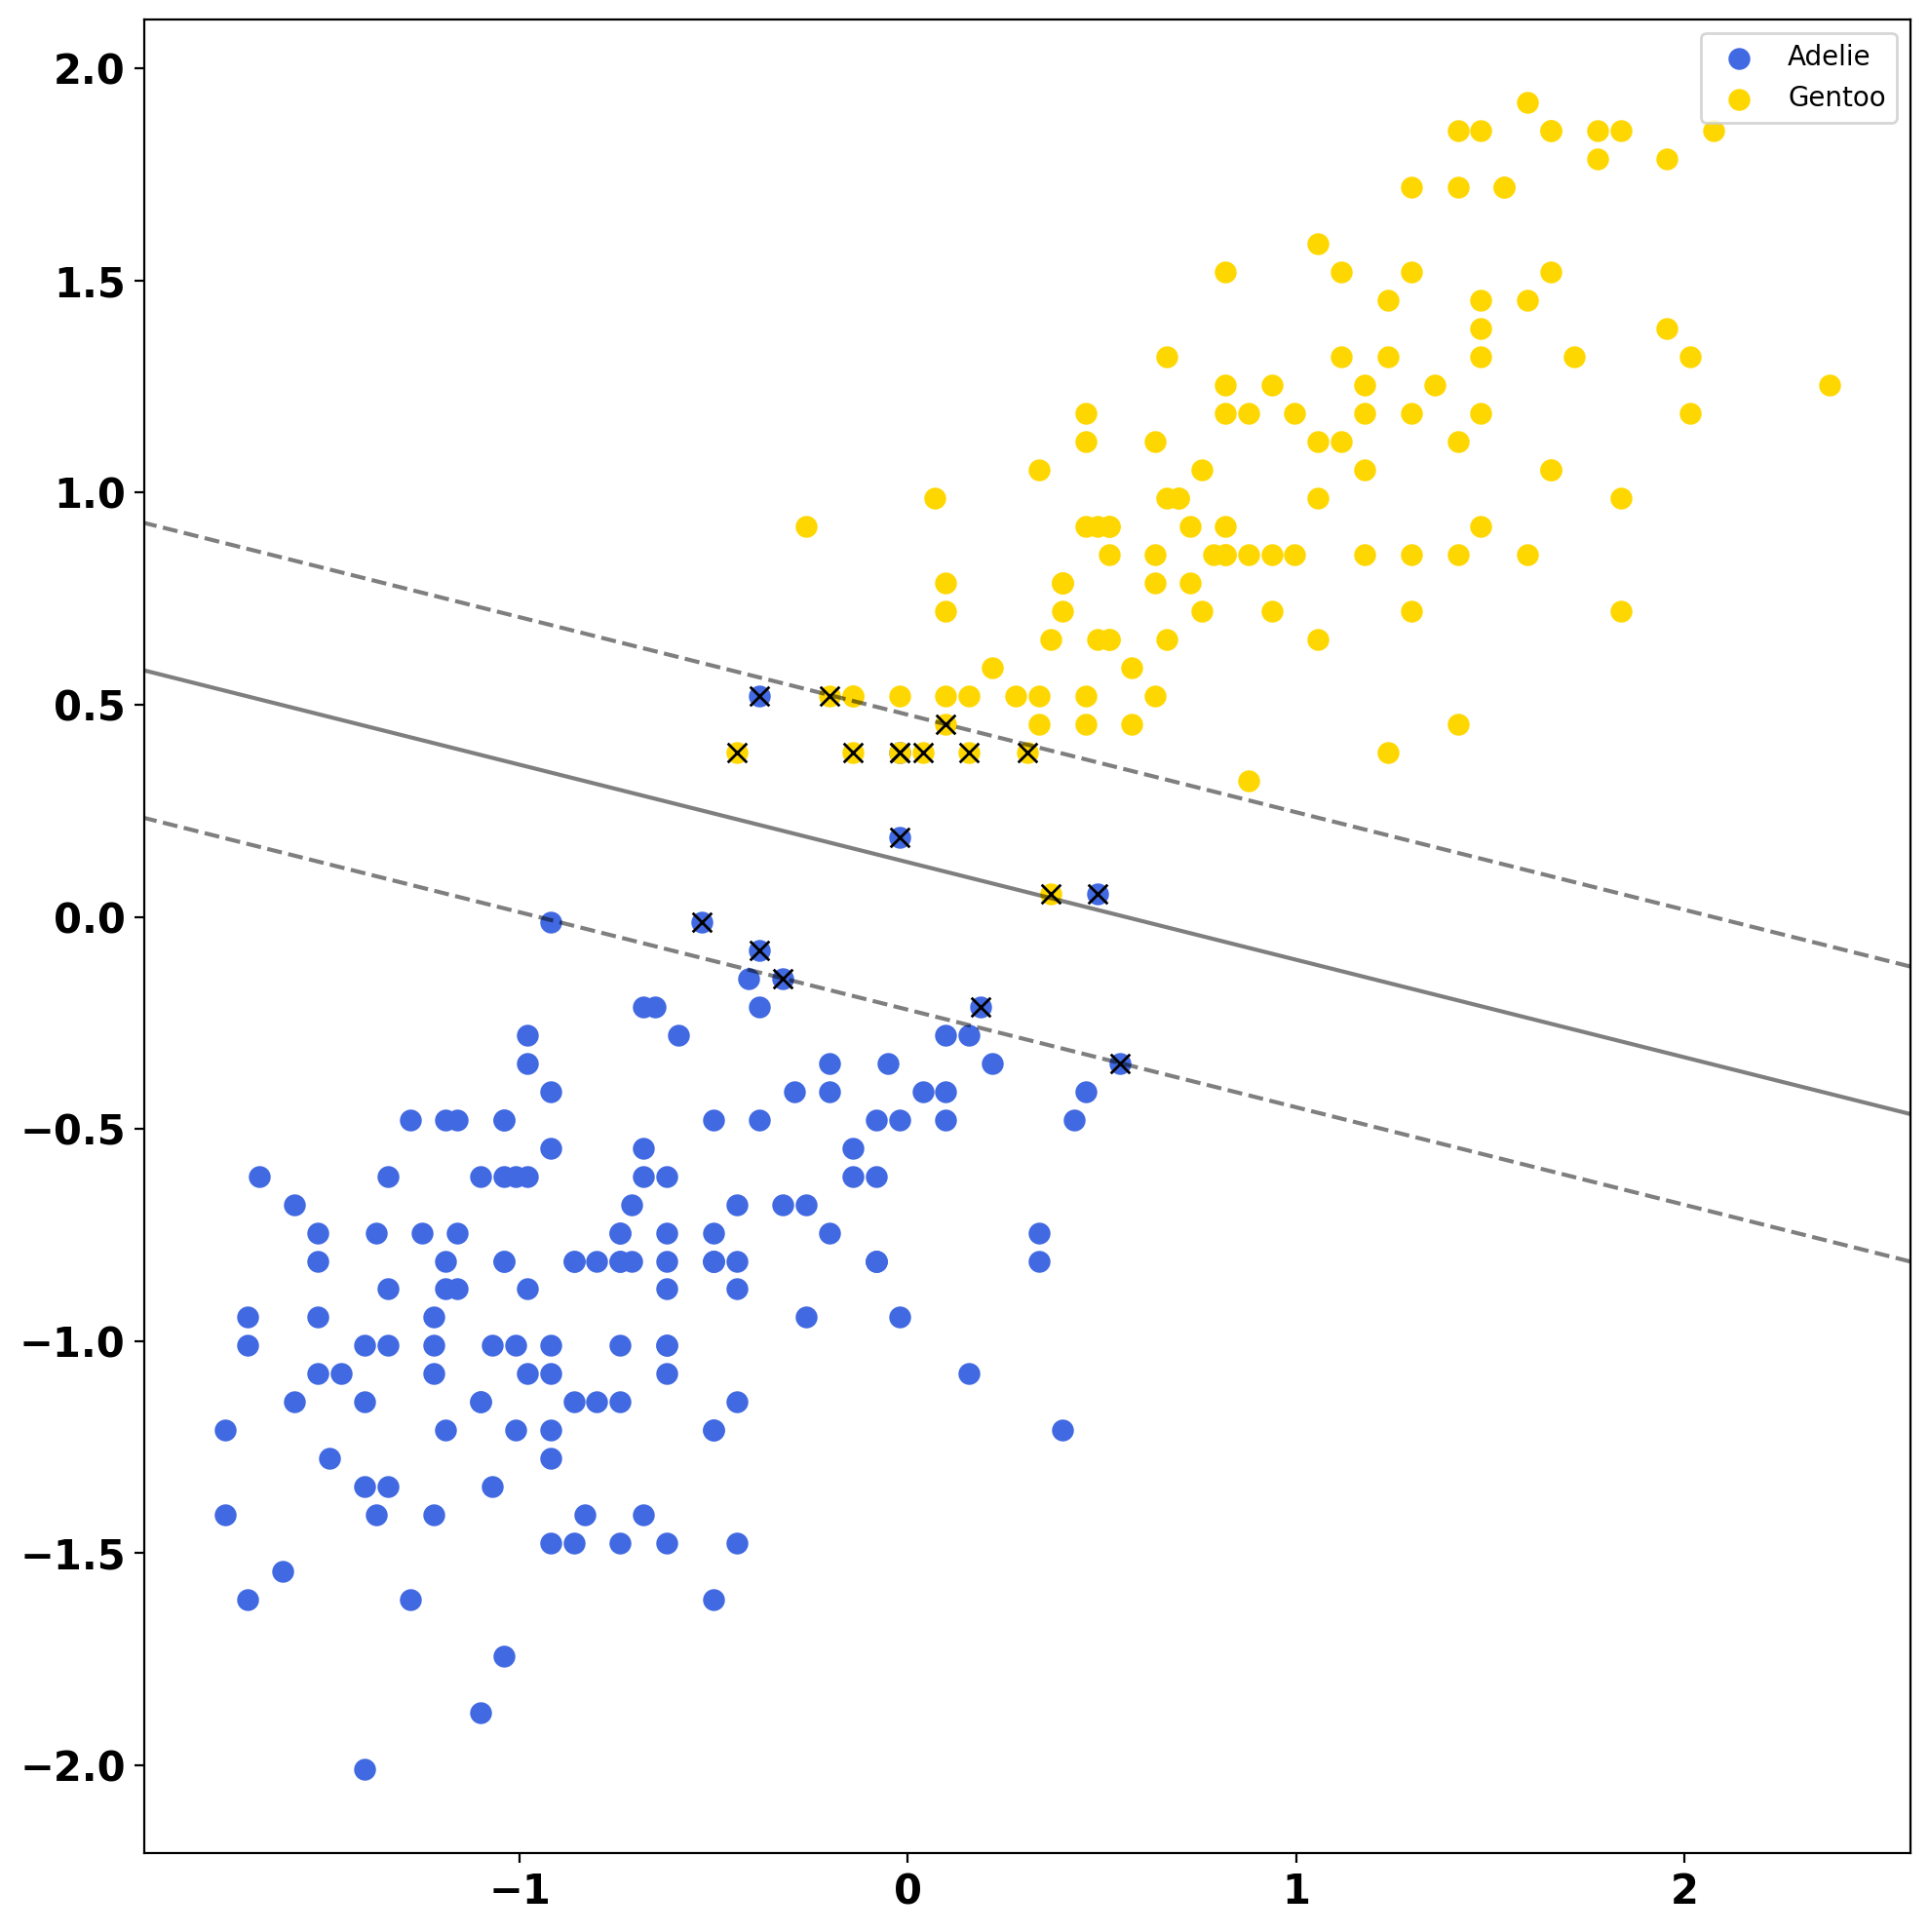

In [22]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==0),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==0),1], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(data_scaled[np.where(penguins_labels["species_int"]==2),0], 
                    data_scaled[np.where(penguins_labels["species_int"]==2),1], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

In [23]:
print(clf.score(data_scaled, labels))

0.9854014598540146


Performance increases with standardization!

From now on we will then standardize at all time here

In [24]:
std_scale = preprocessing.StandardScaler().fit(penguins_features)
penguins_features_scaled = pd.DataFrame(std_scale.transform(penguins_features), columns=penguins_features.columns)

### 3. Perfect case

Let's look at **bill_length_mm** and **bill_depth_mm** now

In [25]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data[["bill_length_mm","bill_depth_mm"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10000)

# fit the model
clf.fit(X= data, y = labels)

X shape: (274, 2)
y shape: (274,)


SVC(C=10000, kernel='linear')

/tmp/ipykernel_94563/2831853790.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_length_mm'],
/tmp/ipykernel_94563/2831853790.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==2]['bill_length_mm'],


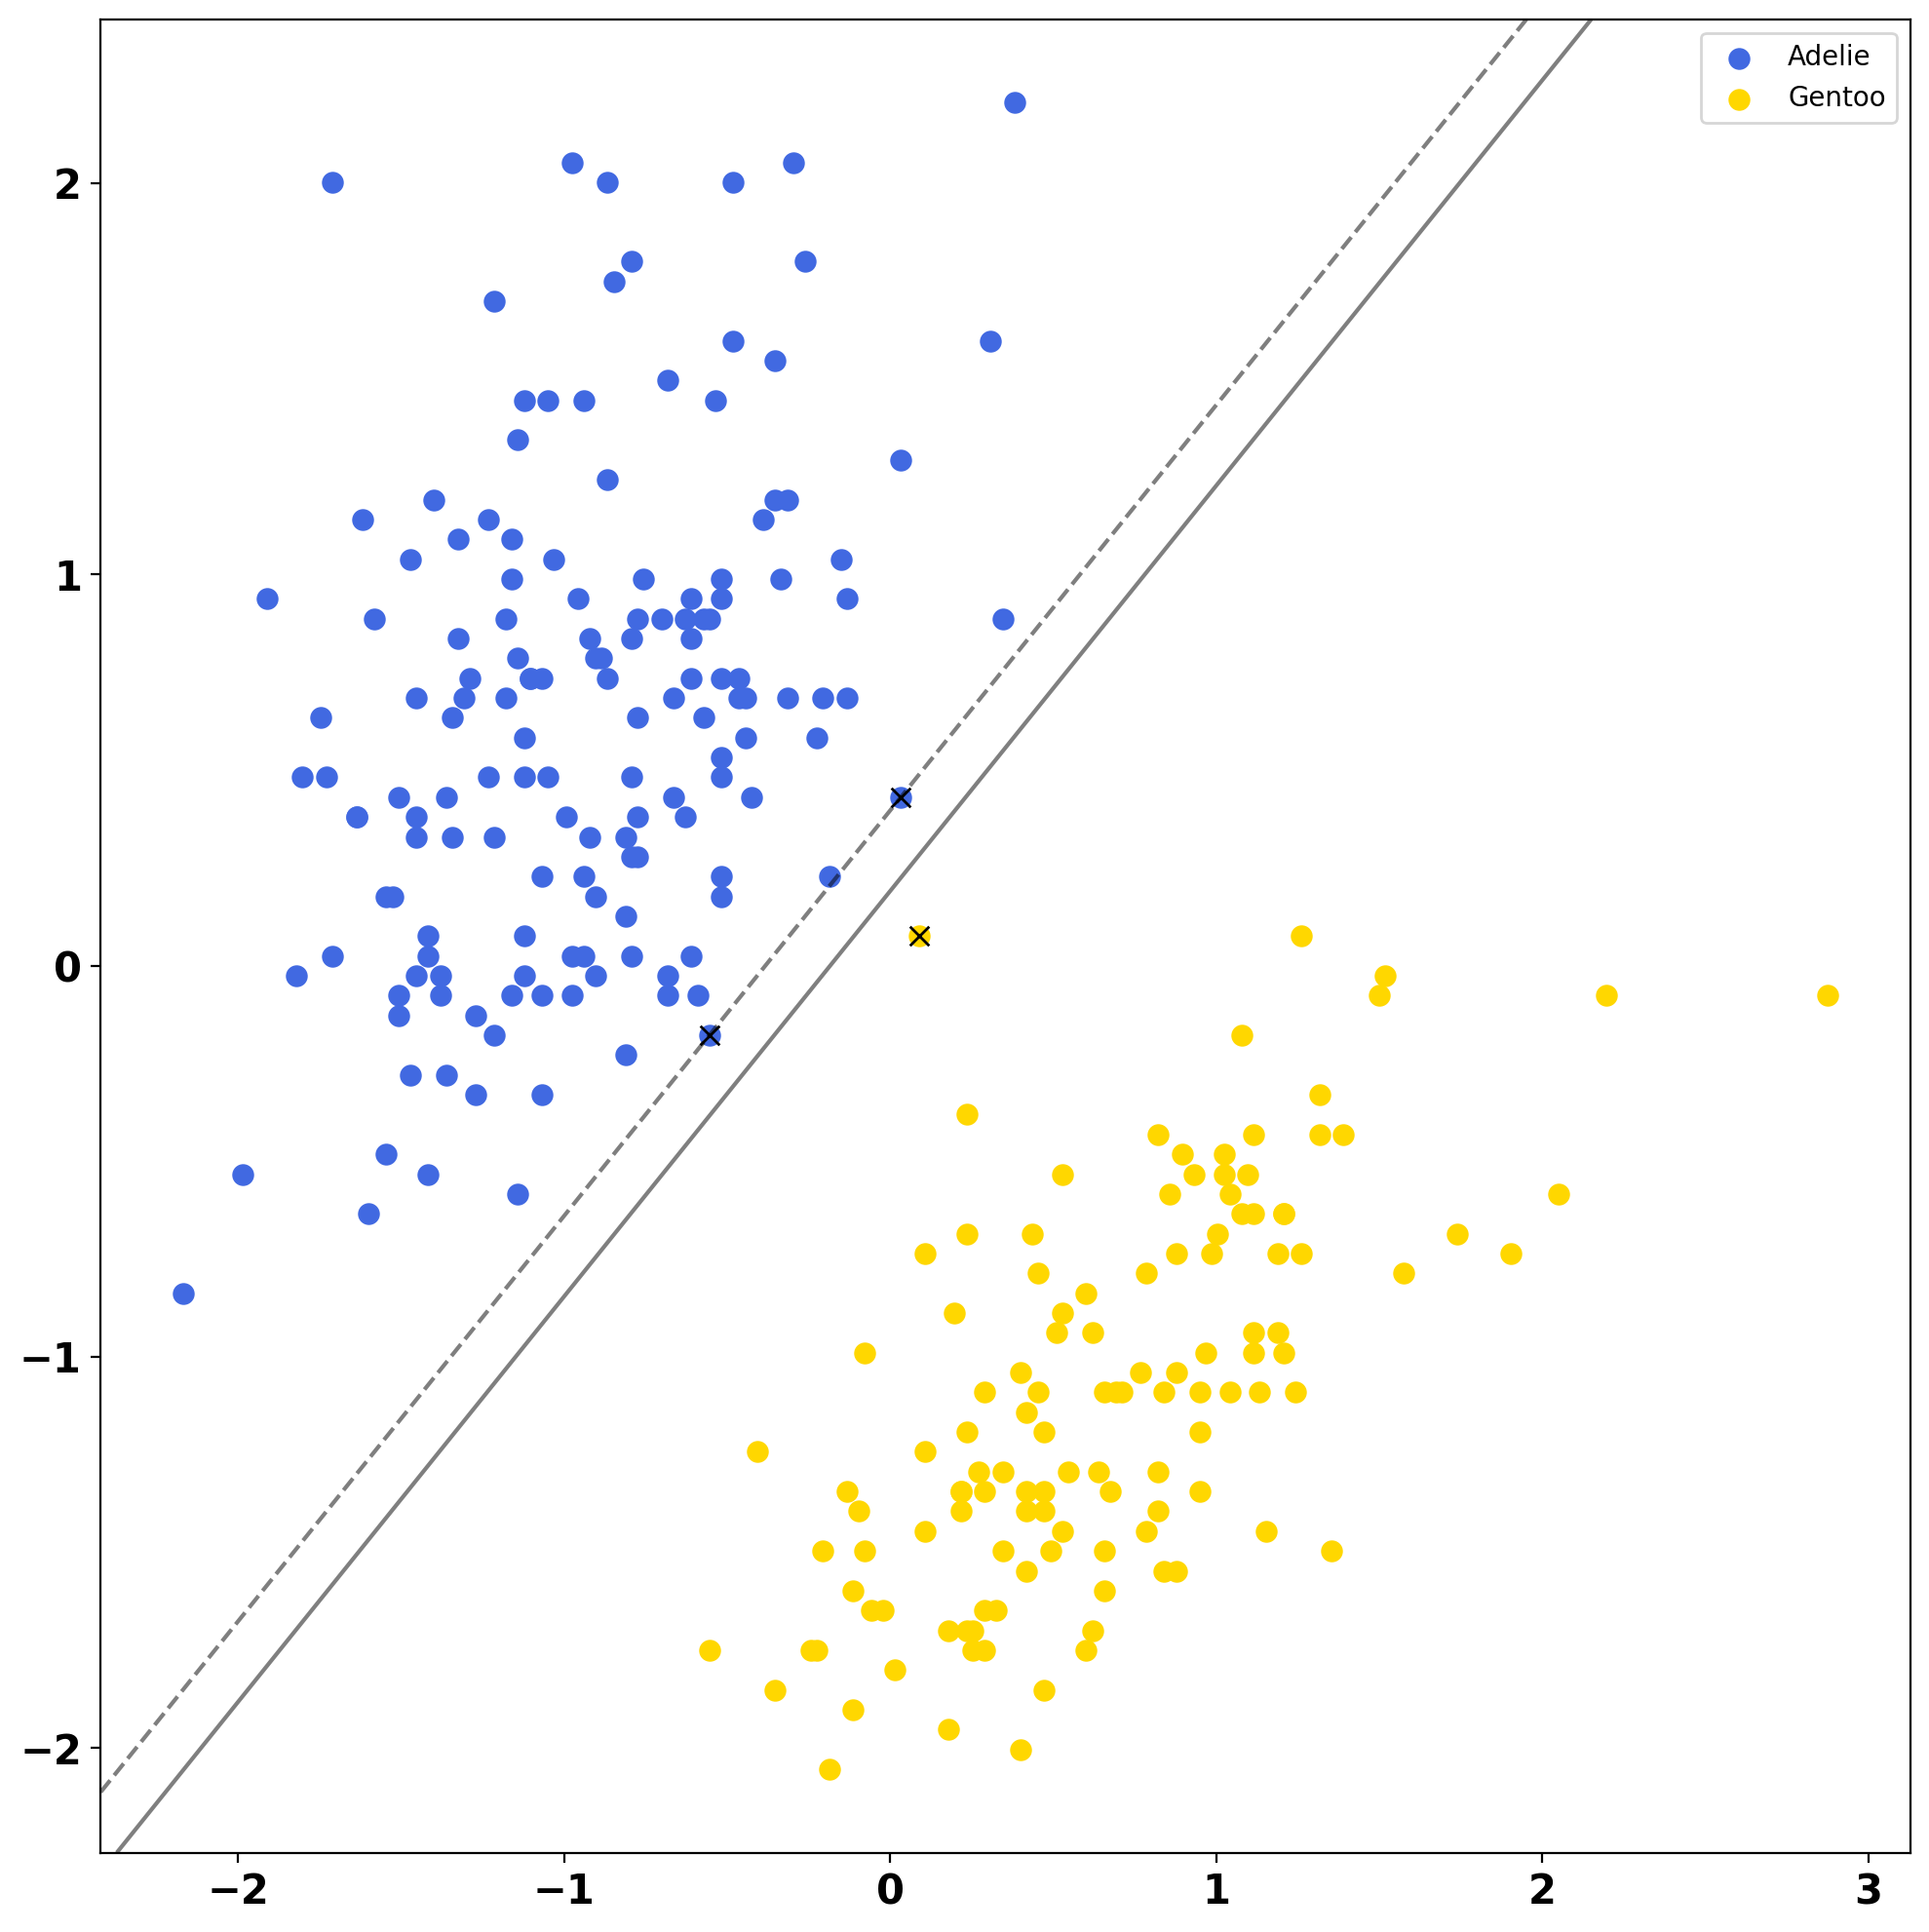

In [26]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_length_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==2]['bill_length_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==2]['bill_depth_mm'], 
                    color="gold", 
                    s=50, 
                    label = 'Gentoo',
                    cmap=plt.cm.Paired)

plt.legend()

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0], 
           alpha=0.5, linestyles=['--', '-'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### 4. Gram matrix

In [27]:
import math

def center_and_normalise_kernel(K_temp):

    K_temp = preprocessing.KernelCenterer().fit_transform(K_temp)
    nb_item = K_temp.shape[0]
    K_norm = np.zeros((nb_item, nb_item))
    for i in range(nb_item):
        for j in range(i, nb_item):
            K_norm[i, j] = K_temp[i, j] / math.sqrt(K_temp[i, i] * K_temp[j, j])
            K_norm[j, i] = K_norm[i, j]

    return K_norm

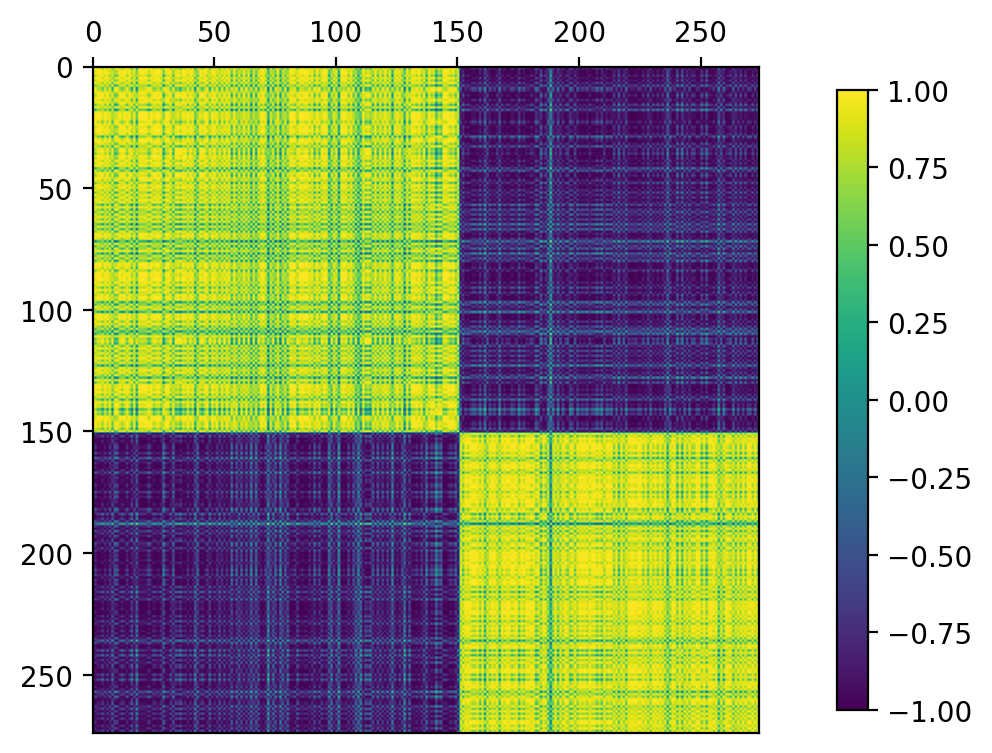

In [28]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

It is easy to see from this matrix that the data can be successfuly classified

### 5. More complex case

Maintenant considérons les deux espèces: **Adelie (0)** et **Chinstrap (1)** et les variables: *body_mass_g* et *bill_depth_mm*.

In [29]:
# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "body_mass_g"]])
print("X shape:", data.shape)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])
print("y shape:", labels.shape)

# initialize a model
clf = svm.SVC(kernel='linear', C=10)

# fit the model
clf.fit(X= data, y = labels)

X shape: (219, 2)
y shape: (219,)


SVC(C=10, kernel='linear')

In [30]:
plt.figure(figsize=(10, 10))

# plot the point cloud
adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'], 
                     penguins_features_scaled[penguins_labels["species_int"]==0]['body_mass_g'], 
                    color="royalblue", 
                    s=50, 
                    label = 'Adelie',
                    cmap=plt.cm.Paired)

gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==1]['bill_depth_mm'], 
                    penguins_features_scaled[penguins_labels["species_int"]==1]['body_mass_g'], 
                    color="lightgreen", 
                    s=50, 
                    label = 'Chinstrap',
                    cmap=plt.cm.Paired)



plt.legend()

# get frame limits
ax = plt.gca()

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], 
           clf.support_vectors_[:, 1], 
           s=50, 
           linewidth=1, 
           marker='x', 
           color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=0, 
           alpha=0.5, linestyles=[ '-',])


# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

/tmp/ipykernel_94563/4082491564.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  adelie = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==0]['bill_depth_mm'],
/tmp/ipykernel_94563/4082491564.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  gentoo = plt.scatter(penguins_features_scaled[penguins_labels["species_int"]==1]['bill_depth_mm'],


Graphiquement, il n'est vraiment pas simple de distinguer et de séparer les deux espèces qu'avec une droite.

In [31]:
print(clf.score(data, labels))

0.6894977168949772


Gram matrix

In [33]:
GramMatrix = np.inner(data, data)
GramMatrix_scaled = center_and_normalise_kernel(GramMatrix)

# heatmap + color map
fig, ax = plt.subplots(figsize=(5, 5))
plot = ax.imshow(GramMatrix_scaled) 

# set axes boundaries
ax.set_xlim([0, data.shape[0]]) ; ax.set_ylim([0, data.shape[0]])

# flip the y-axis
ax.invert_yaxis() ; ax.xaxis.tick_top()

# plot colorbar to the right
plt.colorbar(plot, pad=0.1, fraction=0.04)

We cannot see any particular pattern, unlike the previous example. We thus understand why the linear kernel cannot easily classify in this case.

Let's try other variables 

In [34]:
penguins_adelie_chinstrap = pd.concat([penguins_features[penguins_labels["species_int"].isin([0,1])],
                                    penguins_labels[penguins_labels["species_int"].isin([0,1])]],
                                     axis = 1)

/home/jpldev/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jpldev/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jpldev/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/jpldev/.local/lib/python3.10/site-packages/seabor

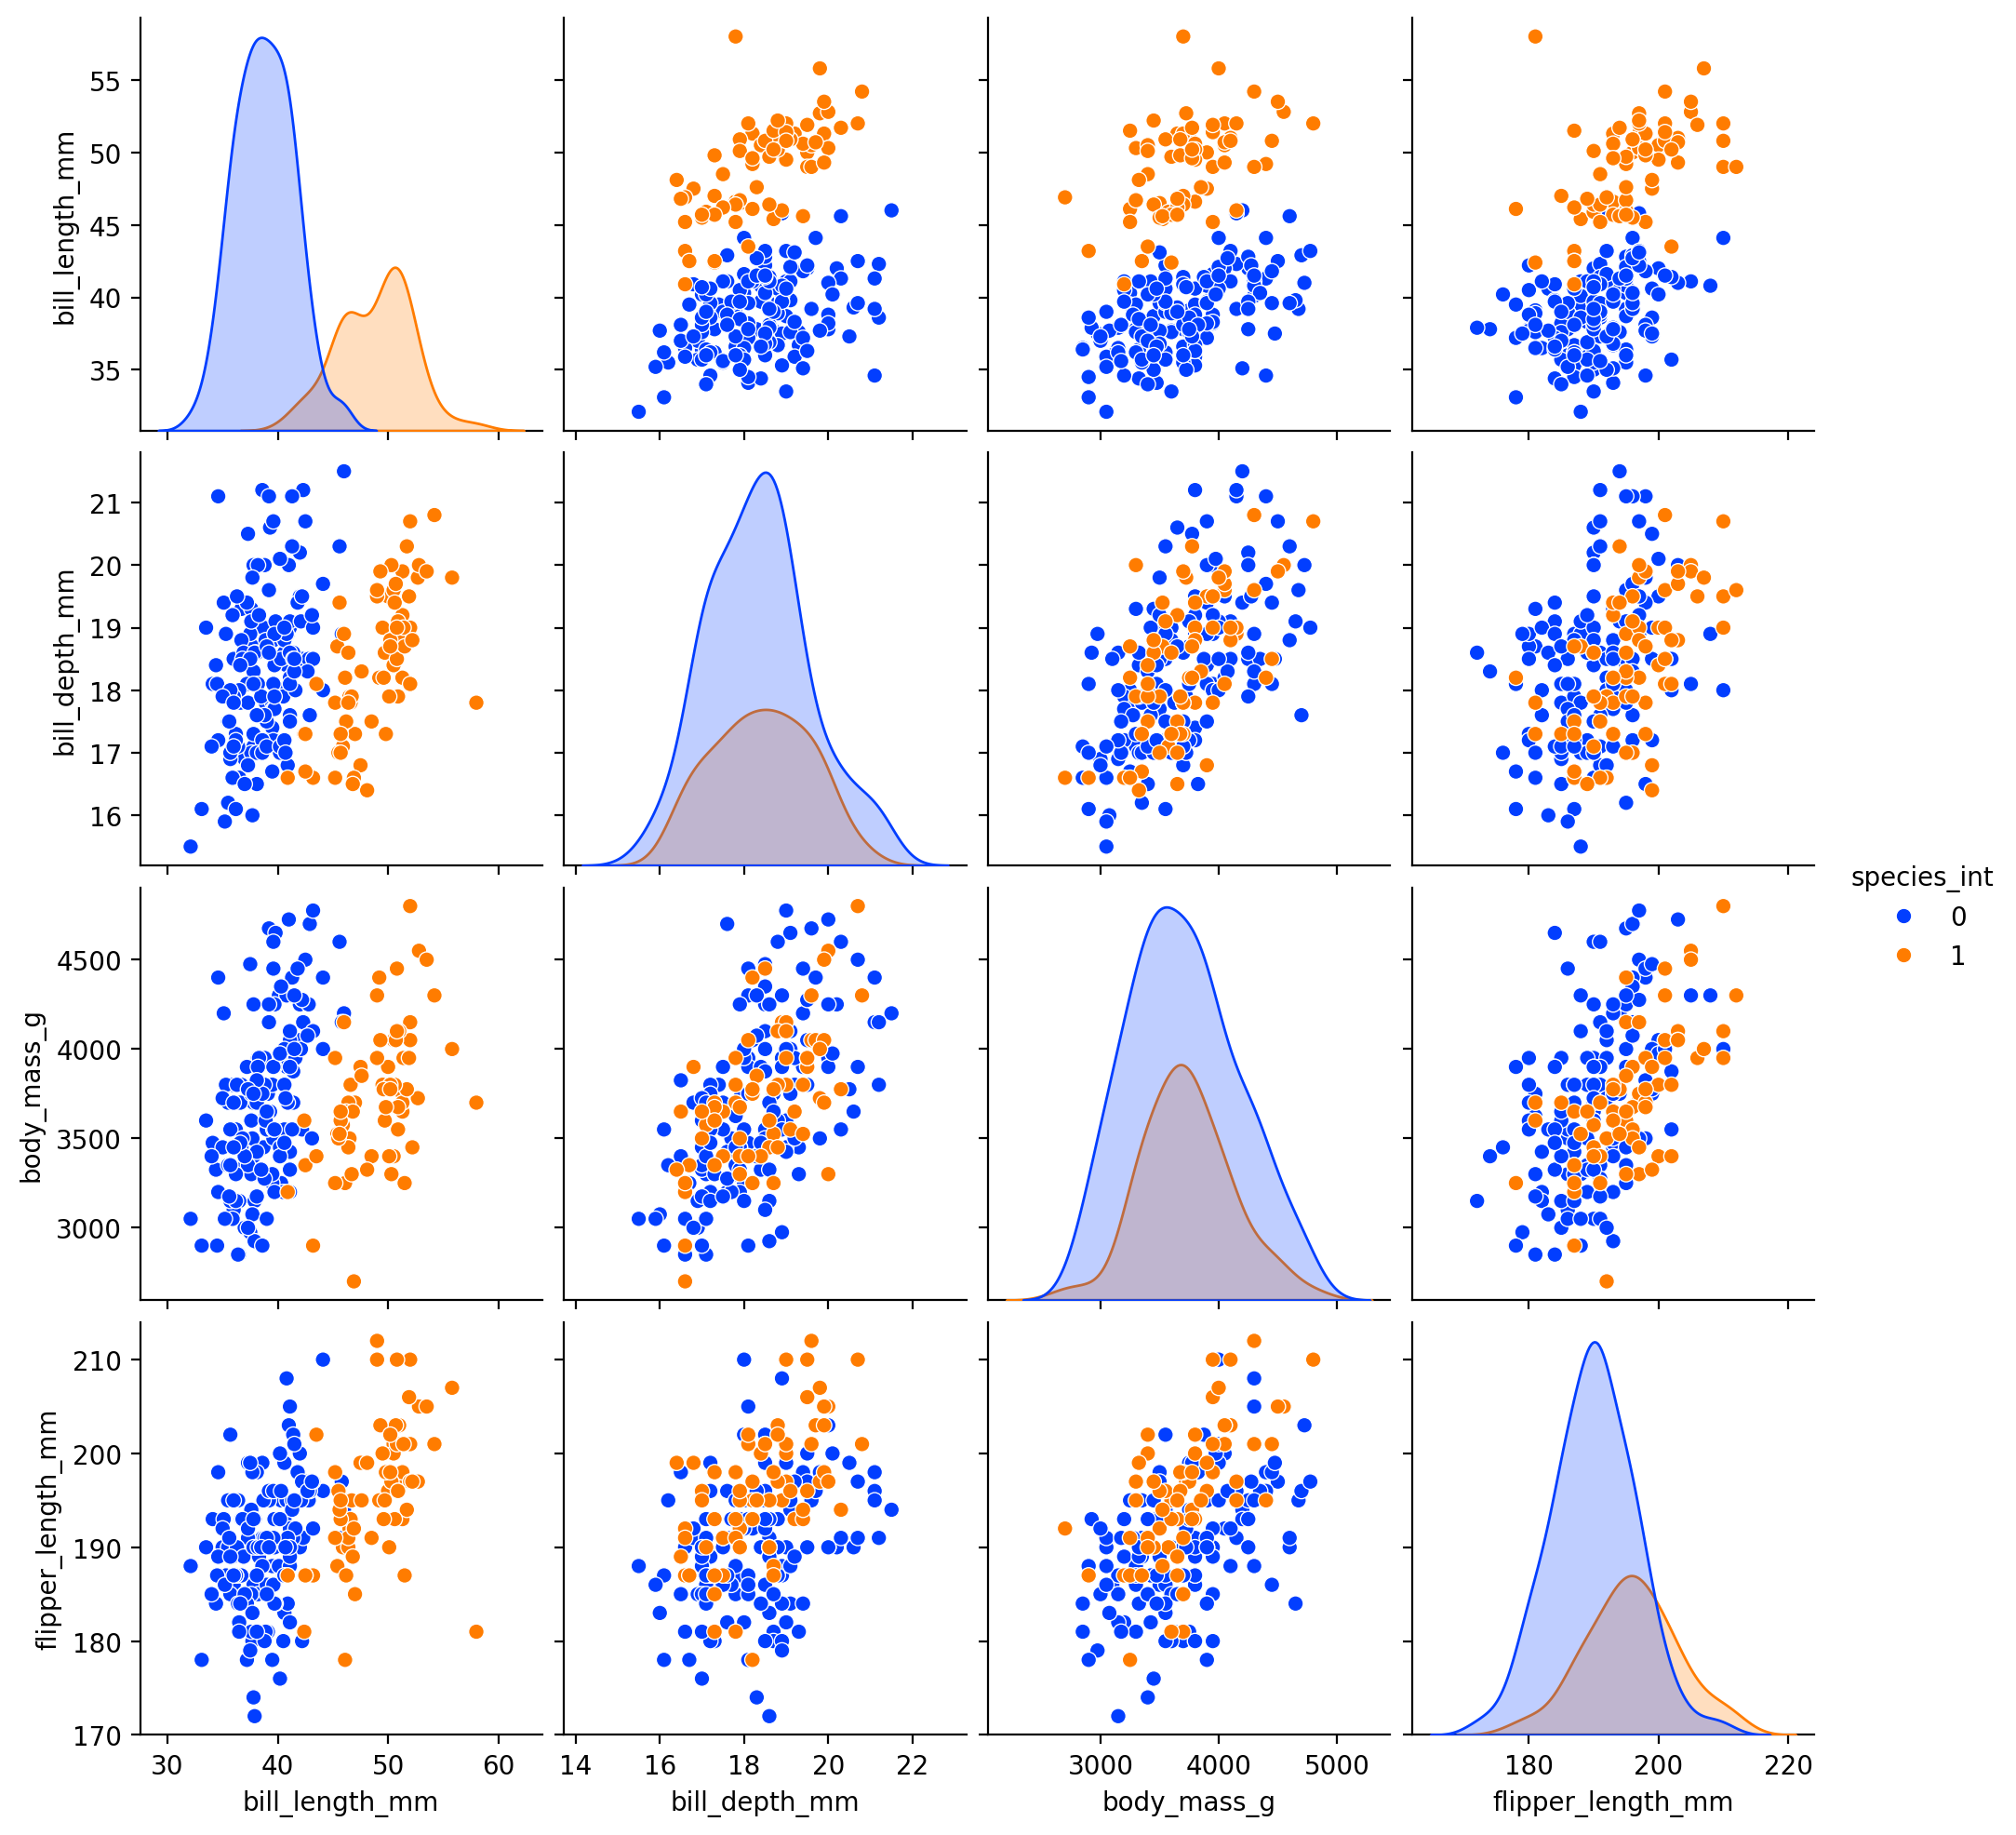

In [35]:
import seaborn as sns
sns.pairplot(penguins_adelie_chinstrap, hue="species_int",palette="bright")

## IV. SVM with non linear kernel

### 1. RBF kernel

Given the formula for Gaussian kernel:

\begin{align}
k(x, x') = \exp\bigg[-\frac{||x - x'||^2}{2 \sigma^2}\bigg]
\end{align}

Another definition with gamma, $\gamma=\frac{1}{2 \sigma^{2}}$ : 

\begin{align}
k(x,x')=\exp\bigg[(-\gamma\||x - x'||^2\bigg]
\end{align}

Let's try different values for gamma

In [36]:
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "bill_length_mm"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

# gamma values
gamma_range = np.linspace(0.01, 200, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.7, gamma=param)
    clf.fit(data, labels)
    score = clf.score(data, labels)
    print("gamma: {0:.2f} | score: {1:.2f}".format(param, score))

gamma: 0.01 | score: 0.95
gamma: 10.54 | score: 0.99
gamma: 21.06 | score: 0.99
gamma: 31.59 | score: 0.99
gamma: 42.11 | score: 0.99
gamma: 52.64 | score: 0.99
gamma: 63.16 | score: 0.99
gamma: 73.69 | score: 0.99
gamma: 84.22 | score: 0.99
gamma: 94.74 | score: 0.99
gamma: 105.27 | score: 0.99
gamma: 115.79 | score: 0.99
gamma: 126.32 | score: 1.00
gamma: 136.85 | score: 1.00
gamma: 147.37 | score: 1.00
gamma: 157.90 | score: 1.00
gamma: 168.42 | score: 1.00
gamma: 178.95 | score: 1.00
gamma: 189.47 | score: 1.00
gamma: 200.00 | score: 1.00


Thus we would think we should take gamma for which the score is equal to 1

### 2. Generalisation

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# split the dataset between train and test
data = penguins_features[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data[["bill_depth_mm", "bill_length_mm"]])

labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

In [39]:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [40]:
# test the performance for different values of gamma
acc_train, acc_test = list(), list()
gamma_range = np.linspace(0.01, 200, 20)
for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.7, gamma=param)
    clf.fit(X_train_scaled, y_train)
    acc_train.append(clf.score(X_train_scaled, y_train))
    acc_test.append(clf.score(X_test_scaled, y_test))

Let's look at the accuracy depending on Gamma values

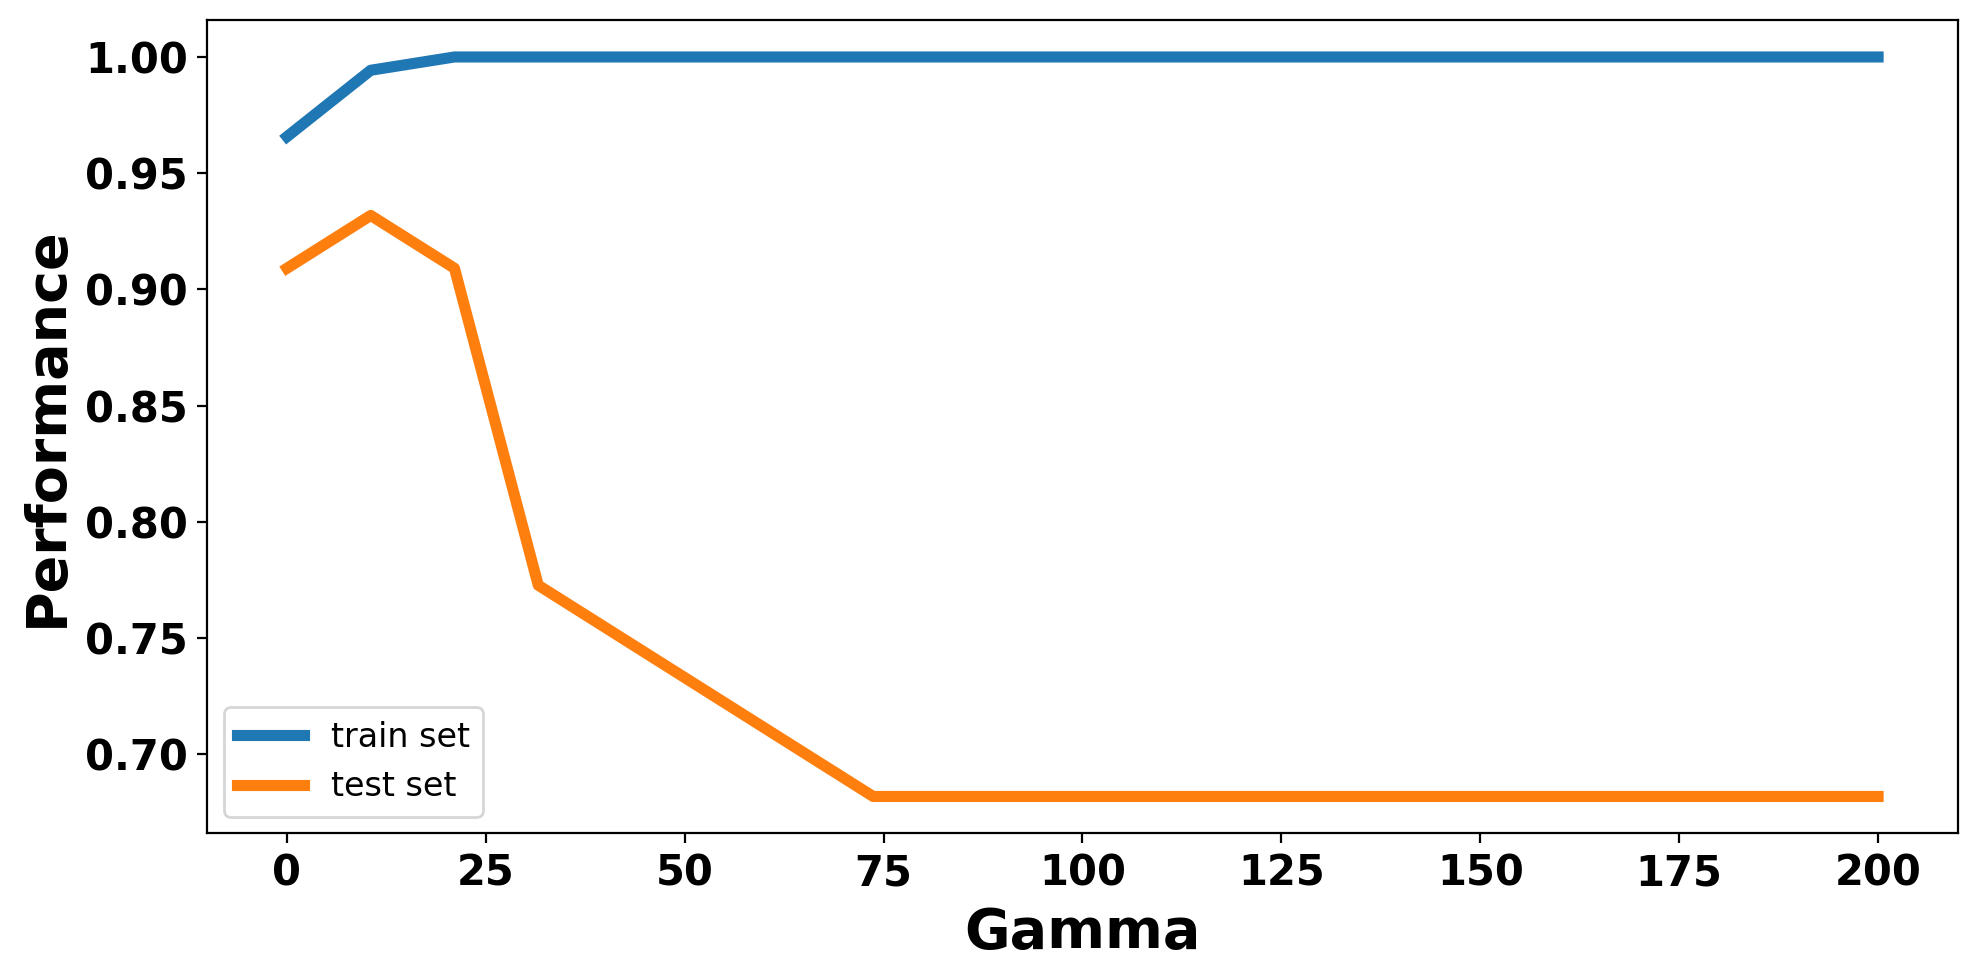

In [41]:
plt.figure(figsize=(10, 5))

# plot train and test scores for different gamma values
plt.plot(gamma_range, acc_train, label='train set', lw=4)
plt.plot(gamma_range, acc_test, label='test set', lw=4)

# add a legend
plt.legend(loc='best', fontsize=12)

# format the plot
plt.xlabel("Gamma", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

There is clearly an overfit starting at Gamma = 10

We cannot either take Gamma = 10 as we would choose it based on our knowledge of the testset. To make an unbiased choice, let's do cross validation and see how Gamma and C impact the results using the function GridSearchCV.

Regardons les performances en faisant varier les paramètres *gamma* et *C*.
Nous allons pour cela utiliser la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) du module model_selection de scikit-learn.

In [42]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [43]:
# define a set of parameter to test
parameters = {'gamma':[ 1, 10, 20, 50], 
             'C':[0.5, 0.7,1]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.5, 0.7, 1], 'gamma': [1, 10, 20, 50]})

[[0.96571429 0.93142857 0.86285714]
 [0.75428571 0.96571429 0.93142857]
 [0.91428571 0.81714286 0.96571429]
 [0.94857143 0.92       0.86285714]]


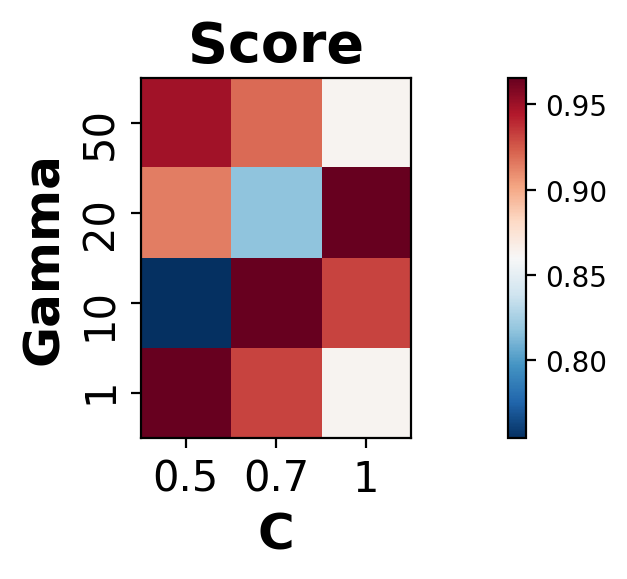

In [44]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 3.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

In the end we choose C=0.5, gamma=1 or C=0.7, gamma=10 or C=1, gamma=20

## Application

Let's find the best parameters for the classifcation with 4 features (*bill_depth_mm*,  *bill_length_mm*, *flipper_length_mm* and *body_mass_g*).


### 1) Adélie (0) vs Gentoo (2)

In [45]:
# Réponse
from sklearn import preprocessing

# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,2])] 
data = np.array(data)

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,2])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

# define a set of parameter to test
parameters = {'gamma':[ 0.1, 1, 10, 20, 50], 
              'C':[0.1, 1, 10, 100]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 20, 50]})

[[1.         0.99534884 0.55708245 0.55708245]
 [0.55708245 1.         1.         0.93139535]
 [0.80824524 0.5845666  1.         1.        ]
 [0.94048626 0.83551797 0.63932347 1.        ]
 [1.         0.94048626 0.83551797 0.63932347]]


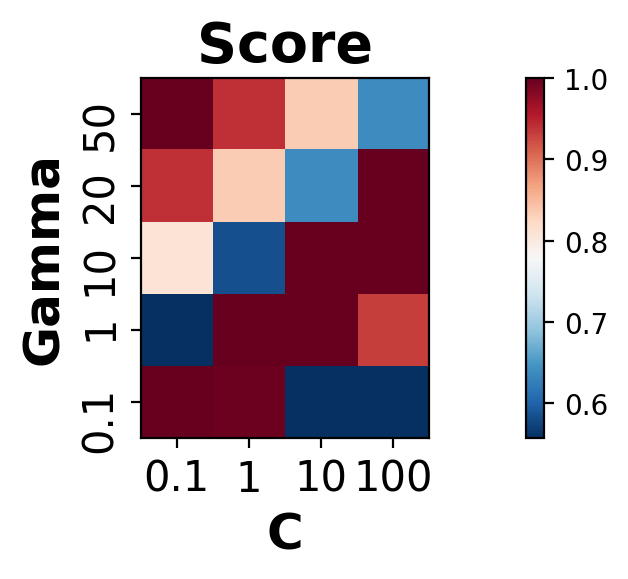

In [46]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 4.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

In [47]:
clf.best_params_

{'C': 0.1, 'gamma': 0.1}

In [48]:
clf.score(X_test_scaled, y_test)

1.0

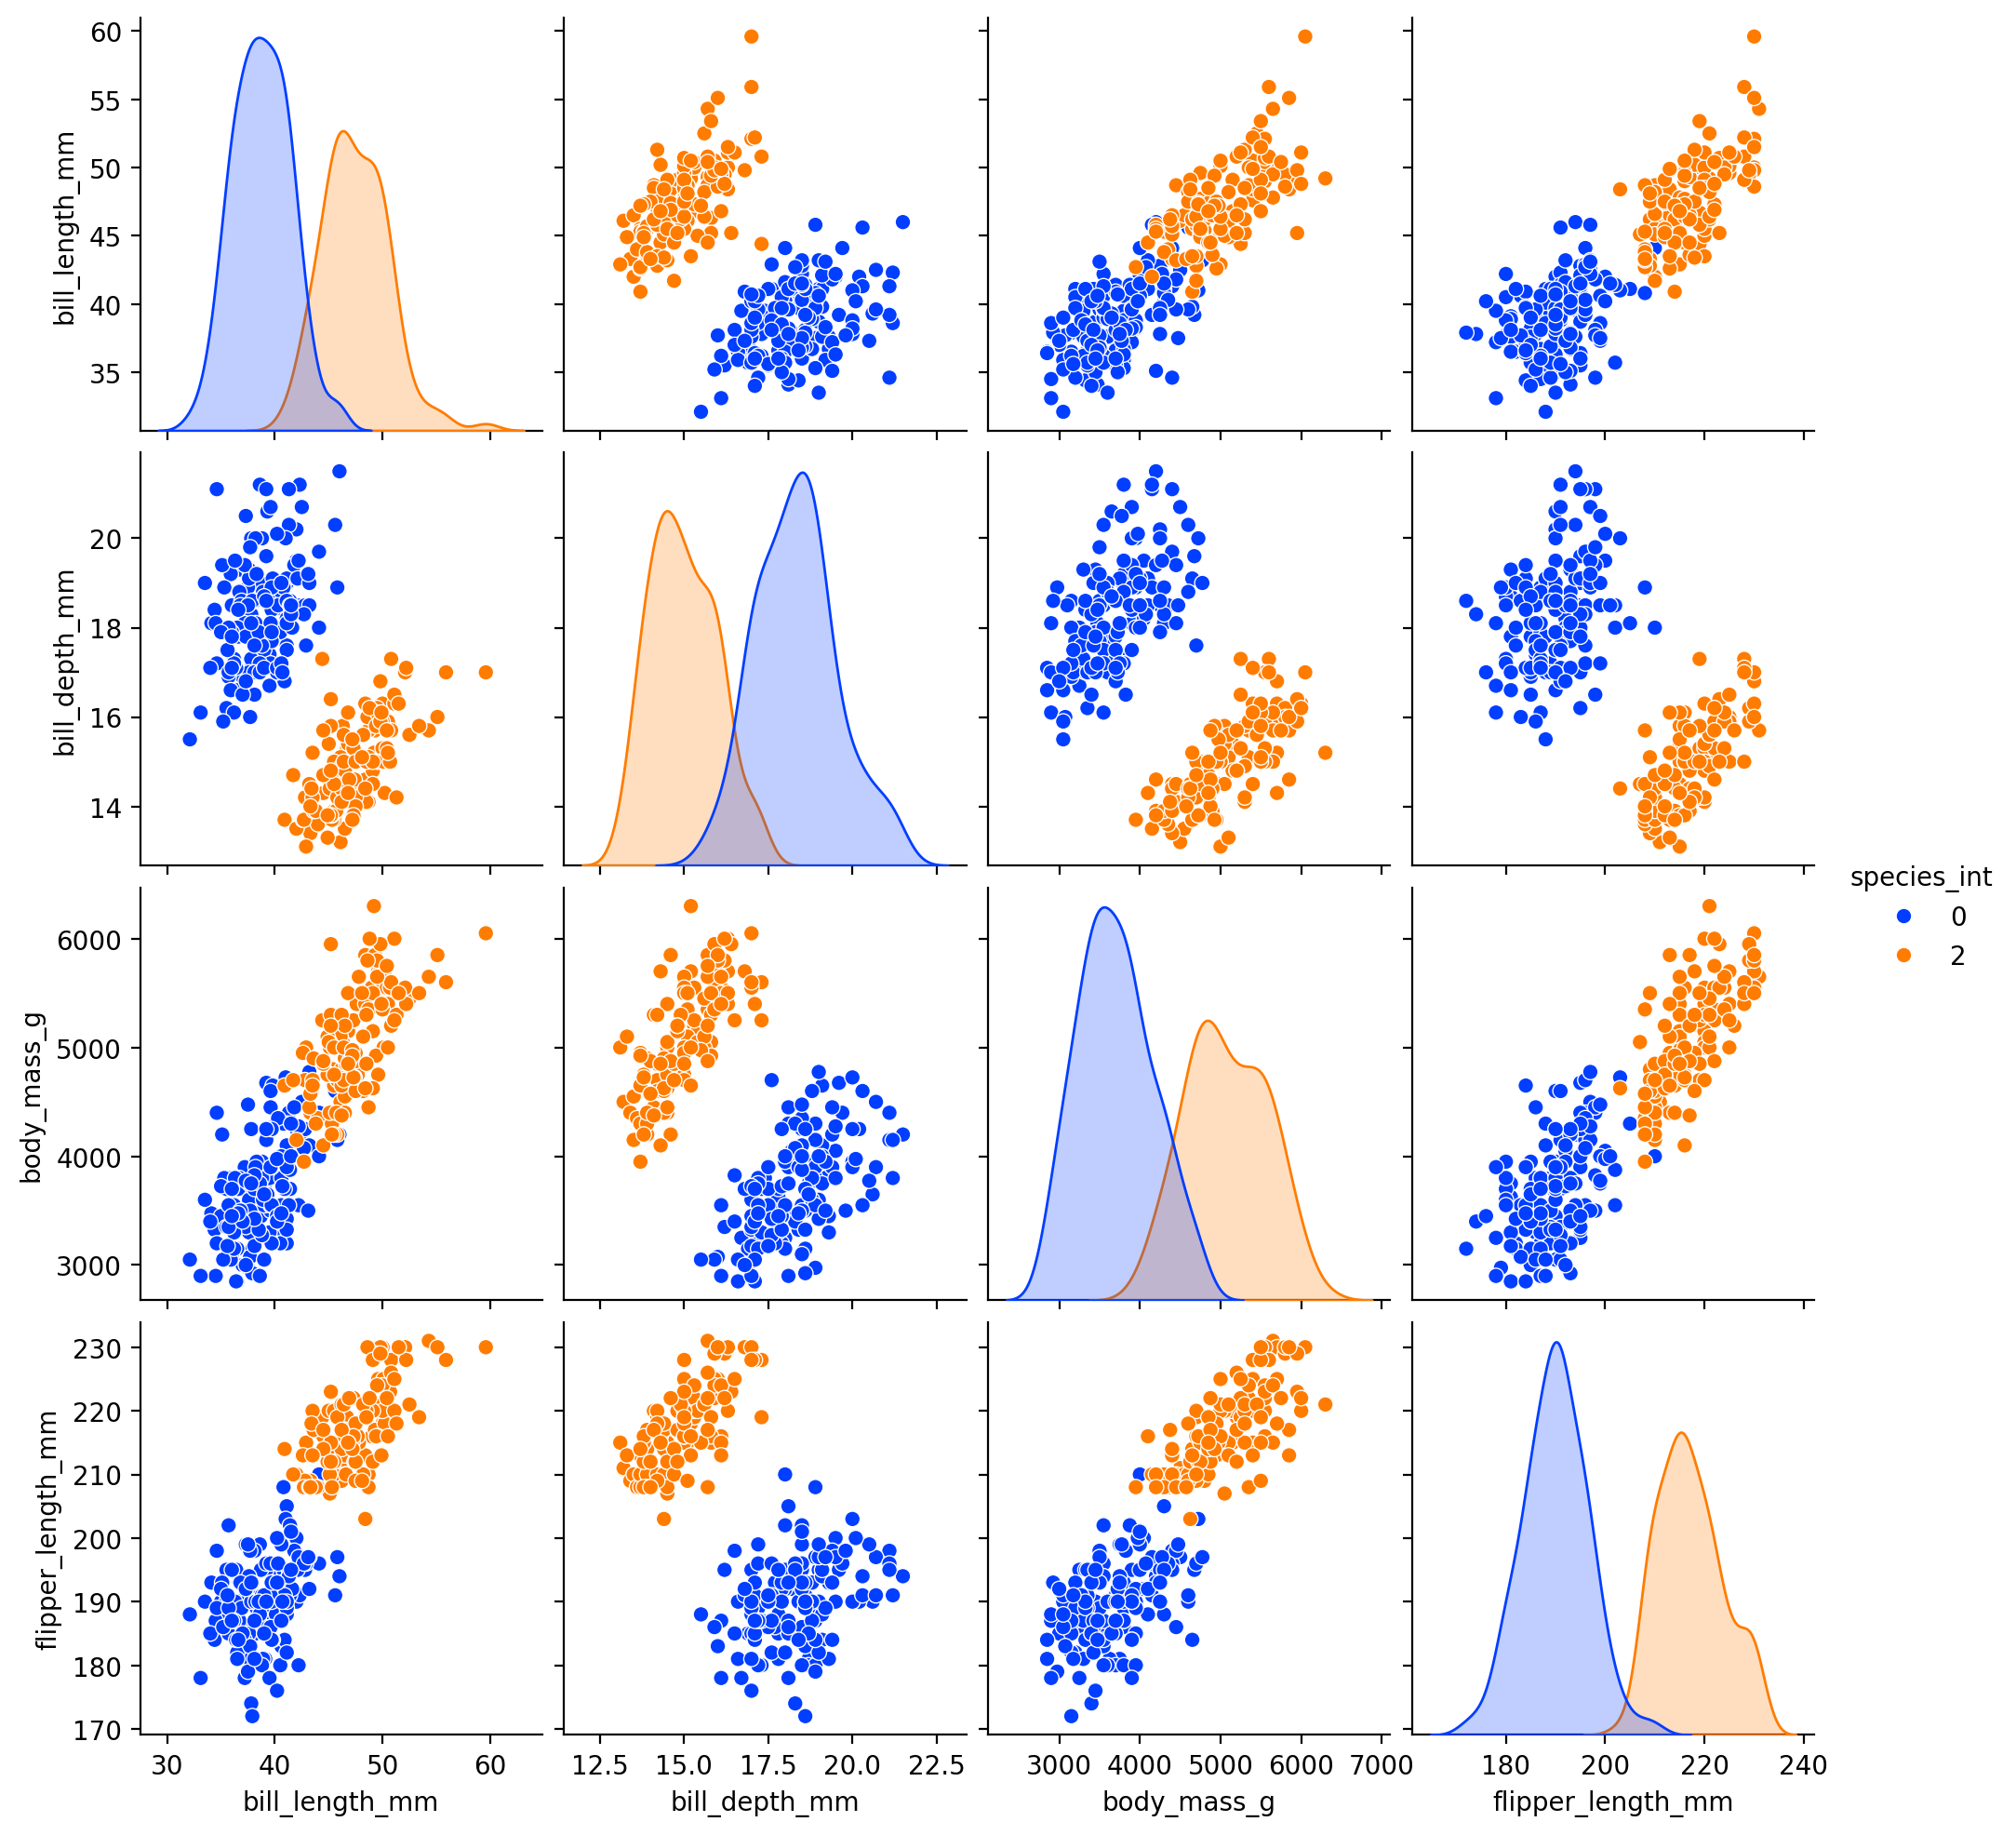

In [49]:
penguins_adelie_gentoo = pd.concat([penguins_features[penguins_labels["species_int"].isin([0,2])],
                                    penguins_labels[penguins_labels["species_int"].isin([0,2])]],
                                     axis = 1)

import seaborn as sns
sns.pairplot(penguins_adelie_gentoo, hue="species_int",palette="bright")

### 2) Adélie (0) vs Chinstrap (1)

Let's do the same thing for those classes.

In [50]:
# Réponse
# Réponse
from sklearn import preprocessing

# Select the 2 features
data = penguins_features_scaled[penguins_labels["species_int"].isin([0,1])] 
data = np.array(data)

# Scale them
std_scale = preprocessing.StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

# select the corresponding labels
labels = penguins_labels[penguins_labels["species_int"].isin([0,1])]
labels = np.array(labels["species_int"])

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    test_size=.2, 
                                                    random_state=21)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scale.transform(X_train)
X_test_scaled = std_scale.transform(X_test)

# define a set of parameter to test
parameters = {'gamma':[ 0.1, 1, 10, 20, 50], 
              'C':[0.1, 1, 10, 100]}

# initialize a model
svc = svm.SVC(kernel='rbf')

# initialize cross validation
clf = GridSearchCV(estimator=svc, 
                   param_grid=parameters,
                   cv=5)

# run the cross validation using train dataset
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 20, 50]})

[[0.91428571 0.70857143 0.69714286 0.69714286]
 [0.69714286 0.97714286 0.96571429 0.69714286]
 [0.69714286 0.69714286 0.96571429 0.97142857]
 [0.73142857 0.69714286 0.69714286 0.96571429]
 [0.97142857 0.73142857 0.69714286 0.69714286]]


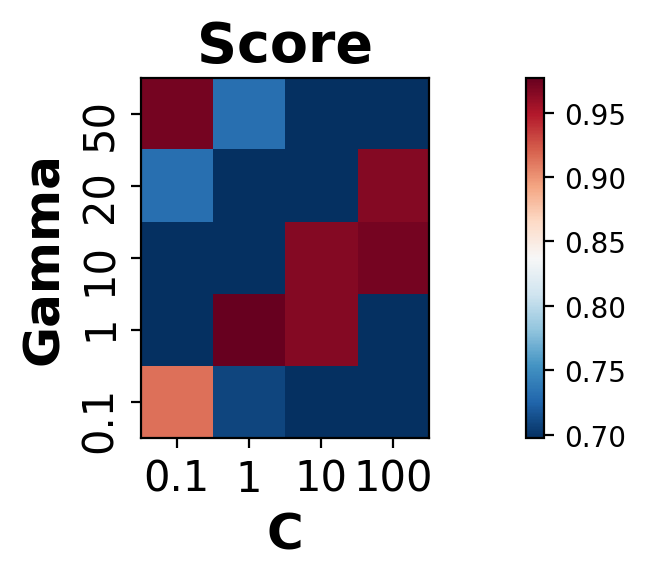

In [51]:
plt.figure(figsize=(10, 3))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['gamma']), len(parameters['C']))
print(scores)

# plot performance scores
# plt.imshow(scores, interpolation='none')
plt.imshow(scores, interpolation='none', cmap="RdBu_r")

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Gamma", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 4.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['gamma'])), parameters['gamma'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

In [52]:
clf.best_params_

{'C': 1, 'gamma': 0.1}

In [53]:
clf.score(X_test_scaled, y_test)

0.9772727272727273